# **Question 1: Visualize the following and give description (maximum 100 words for all three factors)**

**1. CIBIL Score:** The density of approved loans spikes around 600, showing that higher credit scores favor approval. Lower scores correlate with more rejections.  

**2. Education:** Graduates and non-graduates both see more approvals than rejections, but graduates have a slight edge, suggesting education may influence loan status.  

**3. Income:** Higher-income applicants have more approvals, while rejections are evenly spread across incomes, indicating income positively impacts approval chances.


# **Bước 1: Import thư viện cần thiết**

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Bước 2: Đọc file CSV**

In [93]:
data = pd.read_csv("loan_approval (Case Study A).csv")


In [94]:
data.head() #xem 5 dòng đầu tiên
data.info() #để kiểm tra kiểu dữ liệu và thiếu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   2135 non-null   int64 
 1   no_of_dependents          2135 non-null   int64 
 2   education                 2135 non-null   object
 3   self_employed             2135 non-null   object
 4   income_annum              2135 non-null   int64 
 5   loan_amount               2135 non-null   int64 
 6   loan_term                 2135 non-null   int64 
 7   cibil_score               2135 non-null   int64 
 8   residential_assets_value  2135 non-null   int64 
 9   commercial_assets_value   2135 non-null   int64 
 10  luxury_assets_value       2135 non-null   int64 
 11  bank_asset_value          2135 non-null   int64 
 12  loan_status               2135 non-null   object
dtypes: int64(10), object(3)
memory usage: 217.0+ KB


1. DataFrame có 2135 dòng (entries) và 13 cột (columns)
2. RangeIndex: 0-2134 nghĩa là chỉ số của các dòng chạy từ 0 - 2134
3. Non-Null Count: tất cả các cột đều không có giá trị thiếu (Non-Null=2135)
4. Dtype: kiểu dữ liệu của từng cột:
- int64: số nguyên (ví dụ: loan_id, income_annum, cibil_score,...)
- object: dữ liệu kiểu chuỗi/text (ví dụ: education, self_employed, loan_status)

NOTE: cột thiếu dữ liệu: Non-Null < total rows, xử lý bằng cách điền giá trị trung bình, xoá dòng...

# **Bước 3: Khám phá dữ liệu (Exploratory Data Analysis)**

In [95]:
data.describe() #Thống kê cơ bản


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,2135.000000,2135.000000,2.135000e+03,2.135000e+03,2135.000000,2135.000000,2.135000e+03,2.135000e+03,2.135000e+03,2.135000e+03
mean,1068.000000,2.517096,5.085667e+06,1.519859e+07,11.098829,603.827635,7.439719e+06,4.874614e+06,1.522838e+07,5.009087e+06
std,616.465733,1.678622,2.847764e+06,9.183108e+06,5.670843,172.266615,6.556363e+06,4.373474e+06,9.240457e+06,3.297011e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,534.500000,1.000000,2.600000e+06,7.600000e+06,6.000000,459.000000,2.050000e+06,1.300000e+06,7.400000e+06,2.300000e+06
50%,1068.000000,3.000000,5.100000e+06,1.470000e+07,12.000000,607.000000,5.500000e+06,3.600000e+06,1.460000e+07,4.600000e+06
75%,1601.500000,4.000000,7.600000e+06,2.170000e+07,16.000000,754.000000,1.120000e+07,7.500000e+06,2.200000e+07,7.200000e+06
max,2135.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.900000e+07,3.920000e+07,1.470000e+07


In [96]:
data.isnull().sum() #Kiểm tra missing values

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

NOTE: Nếu tất cả các cột ra 0 -> dataset không thiếu dữ liệu, có thể trực tiếp dùng để phân tích

# **Bước 4: Chọn biến cần trực quan hóa**

VD: CIBIL Score, Education, Income

# **Bước 5: Trực quan hoá dữ liệu (Visualize)**

Tạo overview nhanh cho toàn bộ dataset, code tự động duyệt qua tất cả các cột:

- Nếu cột là số → vẽ histogram (phân phối).

- Nếu cột là phân loại → vẽ countplot (tần suất).

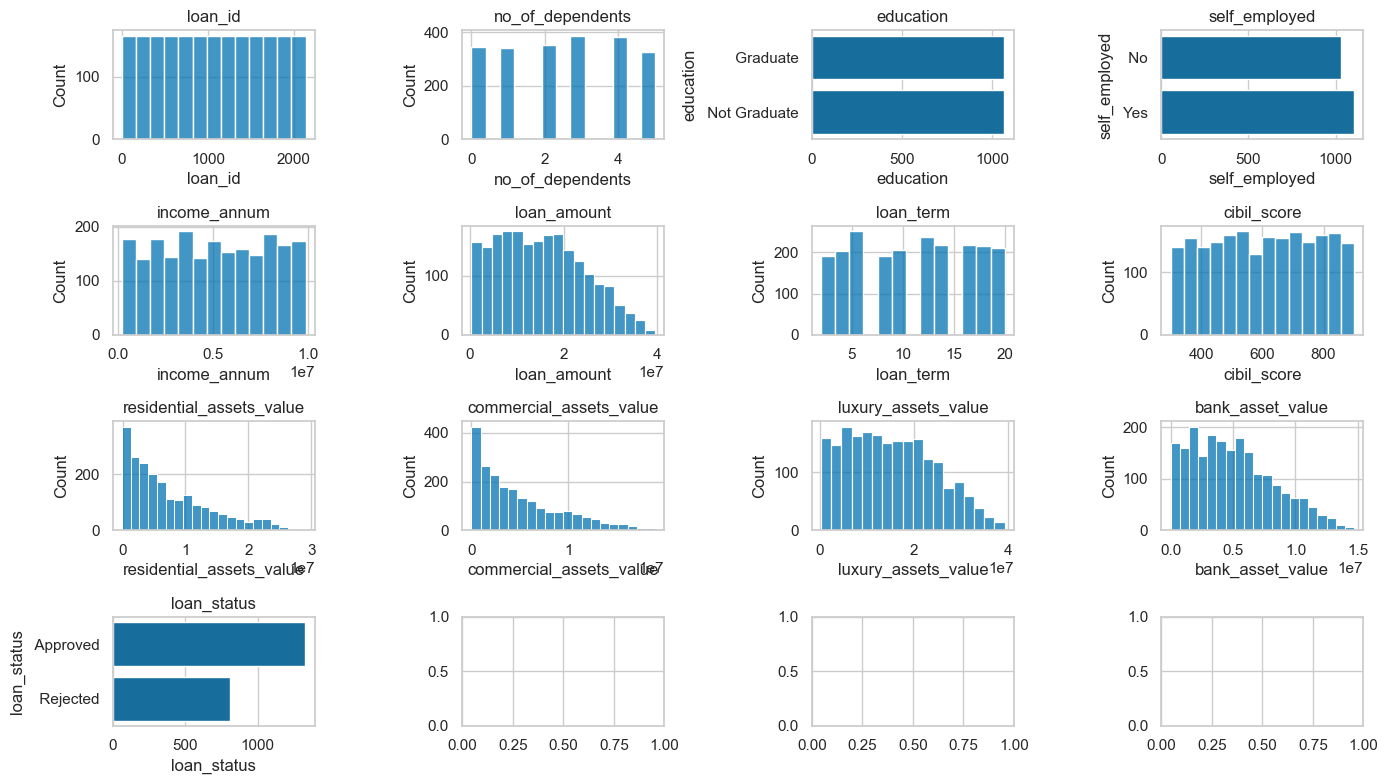

In [163]:
n_rows = 4  # Adjust number of rows based on number of columns
n_cols = 4  # Adjust number of columns

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 8))
axes = axes.flatten()  # Reshape for easier iteration

for i, col in enumerate(data.columns):
    if pd.api.types.is_numeric_dtype(data[col]):
        sns.histplot(data[col], ax=axes[i])  # Use seaborn for enhanced density plots
    else:
        sns.countplot(data[col], ax=axes[i])  # Use countplot for categorical data
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

- Visualize 3 factors: CIBIL Score Education, Income vs Loan Status
- Đây là ví dụ áp dụng các lệnh cơ bản

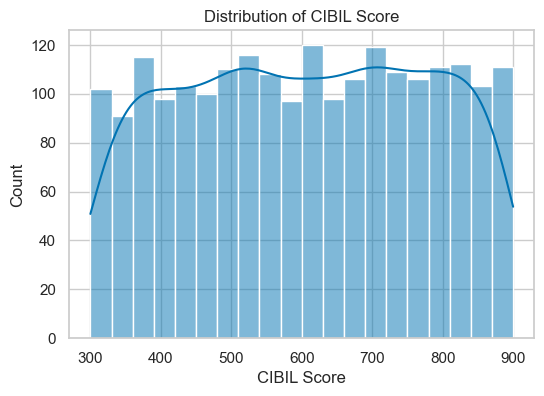

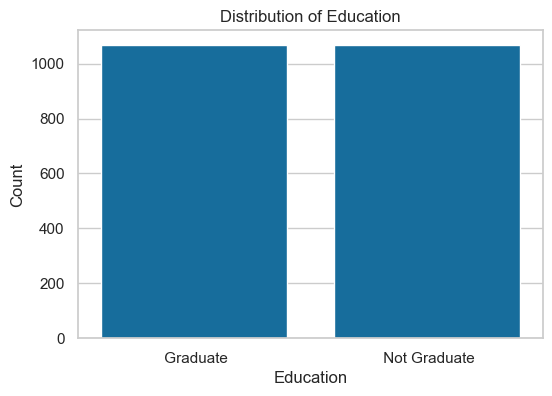

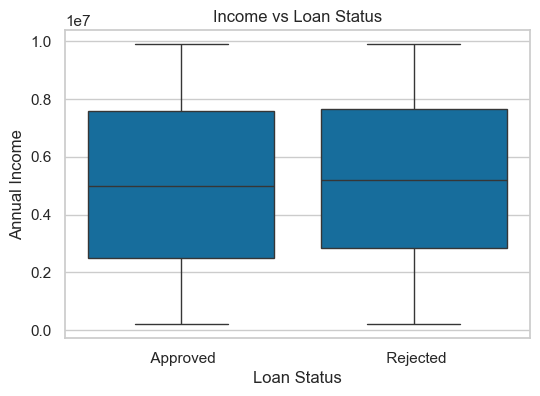

In [164]:
# 1. Distribution of CIBIL Score
plt.figure(figsize=(6,4))
sns.histplot(data['cibil_score'], bins=20, kde=True)
plt.title("Distribution of CIBIL Score")
plt.xlabel("CIBIL Score")
plt.ylabel("Count")
plt.show()

# 2. Distribution of Education
plt.figure(figsize=(6,4))
sns.countplot(x='education', data=data)
plt.title("Distribution of Education")
plt.xlabel("Education")
plt.ylabel("Count")

plt.show()

# 3. Income vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='income_annum', data=data)
plt.title("Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()

- Question 1: Distribution of CIBIL Score by Loan Status (Định lượng ↔ Định tính)

- Code của anh í

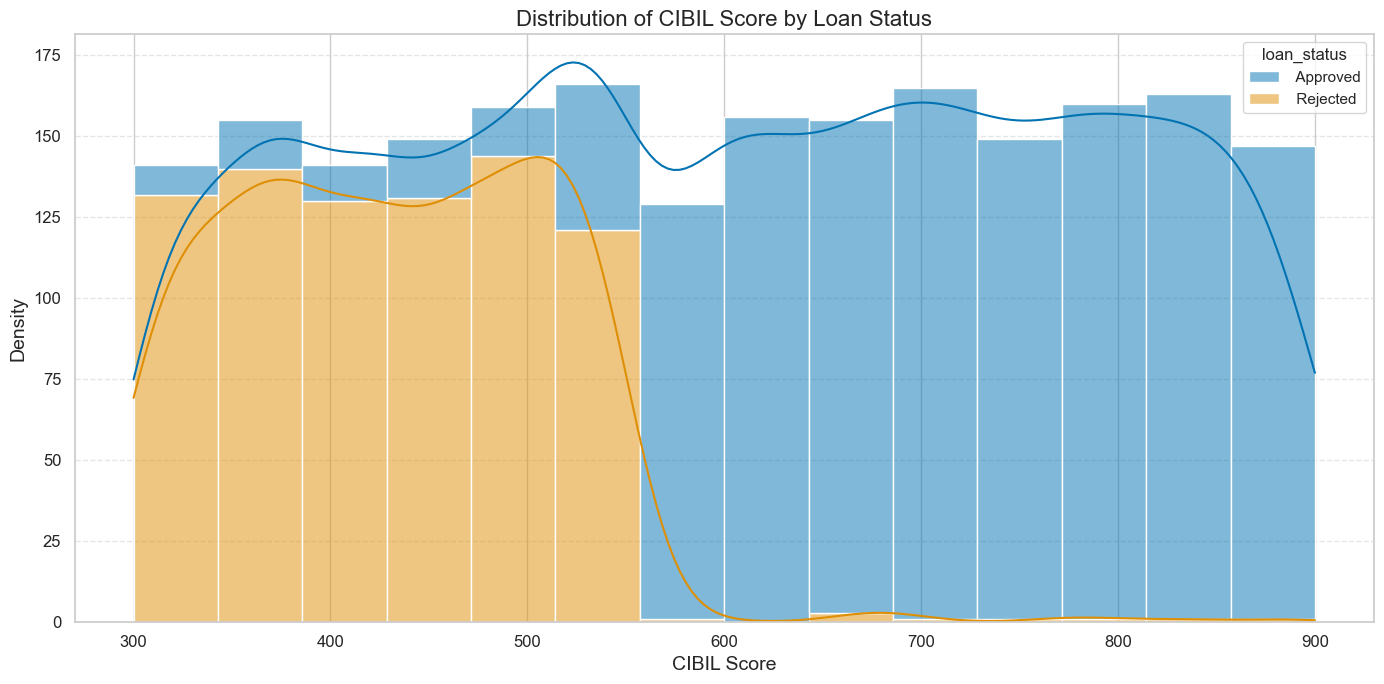

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="colorblind")

# Create a larger figure and plot the distribution
plt.figure(figsize=(14, 7))
ax = sns.histplot(data, x='cibil_score', hue='loan_status', kde=True, multiple='stack', palette='colorblind') 

# Customize labels and title
plt.xlabel('CIBIL Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of CIBIL Score by Loan Status', fontsize=16)

# Adjust layout and axis settings for better appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


- Code của ChatGPT

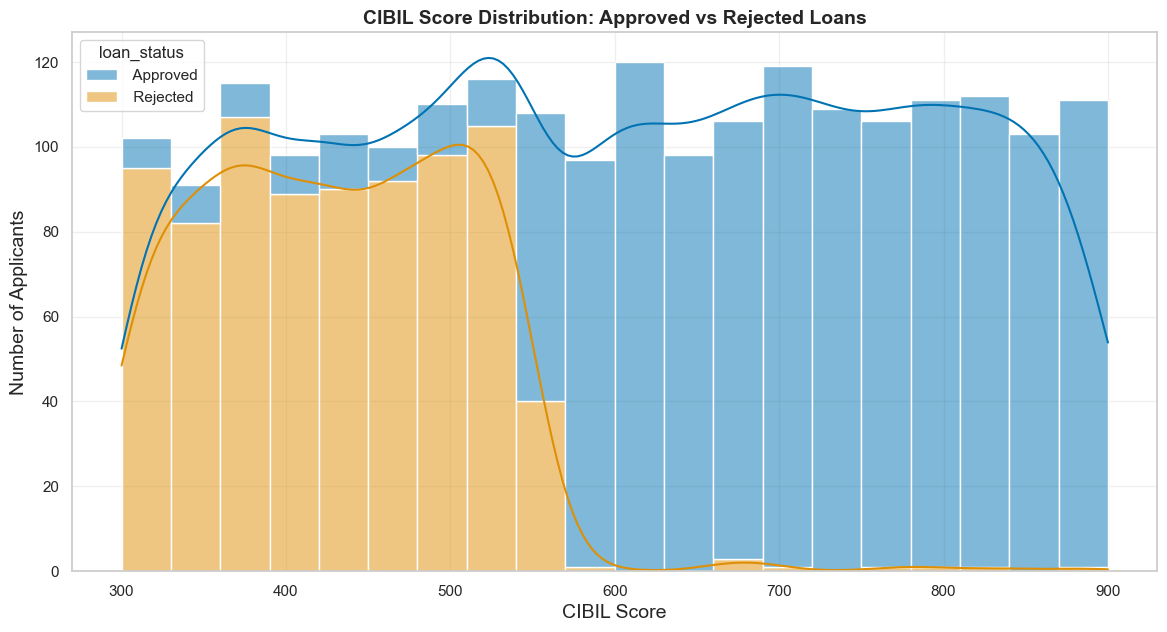

In [166]:
plt.figure(figsize=(14,7))
sns.histplot(
    data=data, 
    x='cibil_score', 
    hue='loan_status', #hue="loan_status" → phân nhóm dữ liệu theo cột loan_status và tô màu khác nhau cho từng nhóm.
    multiple="stack",
    bins=20,
    kde=True, #kde=True → vẽ đường cong phân phối xác suất (density curve).
    alpha=0.5,
)

plt.title("CIBIL Score Distribution: Approved vs Rejected Loans", fontsize=14, fontweight='bold')
plt.xlabel("CIBIL Score", fontsize=14)
plt.ylabel("Number of Applicants", fontsize=14)
plt.grid(alpha=0.3)

plt.show()


- Cú pháp: df['TênCột'].value_counts()
- Dùng cho biến định tính (categorical) hoặc cả số nhưng mang ý nghĩa phân loại.
- Nó sẽ đếm tần suất xuất hiện của từng giá trị trong 1 cột.
- Thường dùng khi muốn biết có bao nhiêu người “Approved/Rejected”, bao nhiêu “Male/Female”, hoặc tần suất của từng điểm CIBIL cụ thể


In [167]:
import pandas as pd

In [168]:
print(data['education'].value_counts())

education
Graduate        1068
Not Graduate    1067
Name: count, dtype: int64


In [169]:
print(data['loan_status'].value_counts())

loan_status
Approved    1328
Rejected     807
Name: count, dtype: int64


In [170]:
print(data['cibil_score'].describe())

count    2135.000000
mean      603.827635
std       172.266615
min       300.000000
25%       459.000000
50%       607.000000
75%       754.000000
max       900.000000
Name: cibil_score, dtype: float64


- Question 1: Distribution of Education Levels by Loan Status (Định tính ↔ Định tính)

- Code của ChatGPT

       education loan_status
0       Graduate    Approved
1   Not Graduate    Rejected
2       Graduate    Rejected
3   Not Graduate    Rejected
4       Graduate    Approved


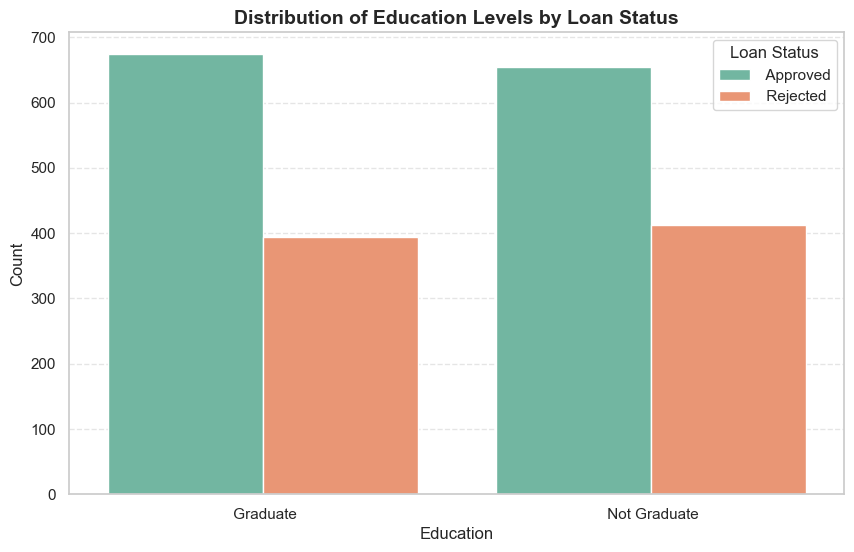

In [171]:
# Kiểm tra nhanh dữ liệu
print(data[['education', 'loan_status']].head())

# Vẽ biểu đồ mối quan hệ giữa education và loan_status
plt.figure(figsize=(10,6))
sns.countplot(data, x='education', hue='loan_status', palette="Set2")

# Thêm số trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x = p.get_x() + p.get_width()/2,   # vị trí ngang giữa cột
            y = height + 5,                   # cao hơn đầu cột một chút
            s = f'{int(height)}',             # nội dung số
            ha = 'center'
        )
# Trang trí
plt.title("Distribution of Education Levels by Loan Status", fontsize=14, fontweight='bold')
plt.xlabel("Education", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status")
plt.grid(axis='y', linestyle="--", alpha=0.5)

plt.show()

- Code của anh í

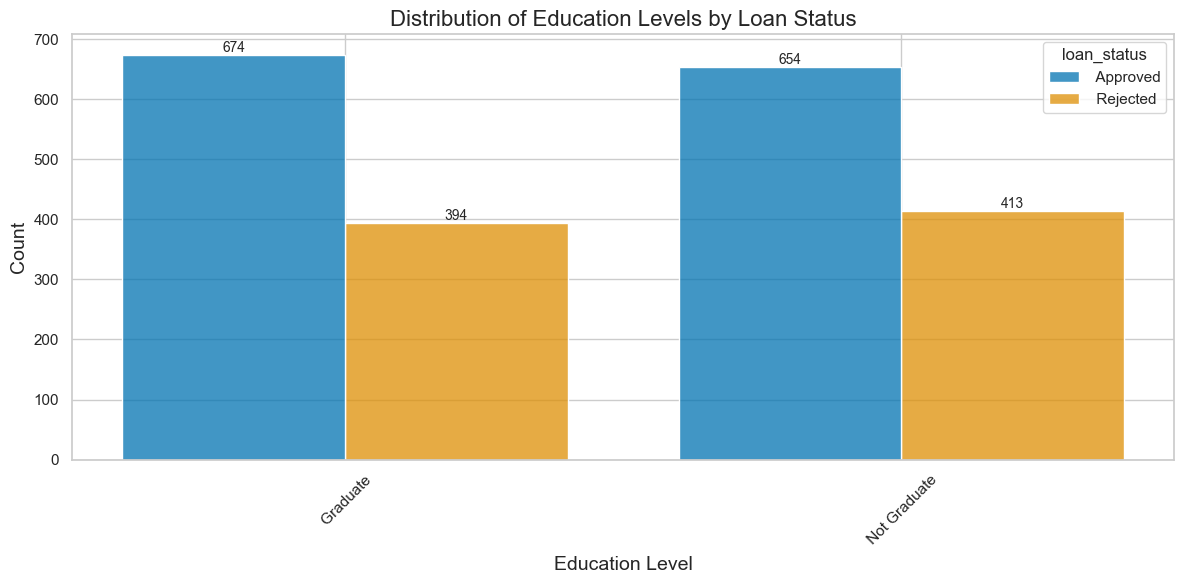

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="colorblind")

# Create a subplot with a larger figure size
plt.figure(figsize=(12, 6))

# Plot the histogram
ax = sns.histplot(data, x='education', hue='loan_status', multiple='dodge', shrink=0.8)

# Add data labels on top of each bar
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars that have a height
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

# Set labels and title with improved formatting
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Education Levels by Loan Status', fontsize=16)
plt.xticks(rotation=45)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

- Question 1: Distribution of Annual Income by Loan Status (Định lượng ↔ Định tính)

- Code của ChatGPT

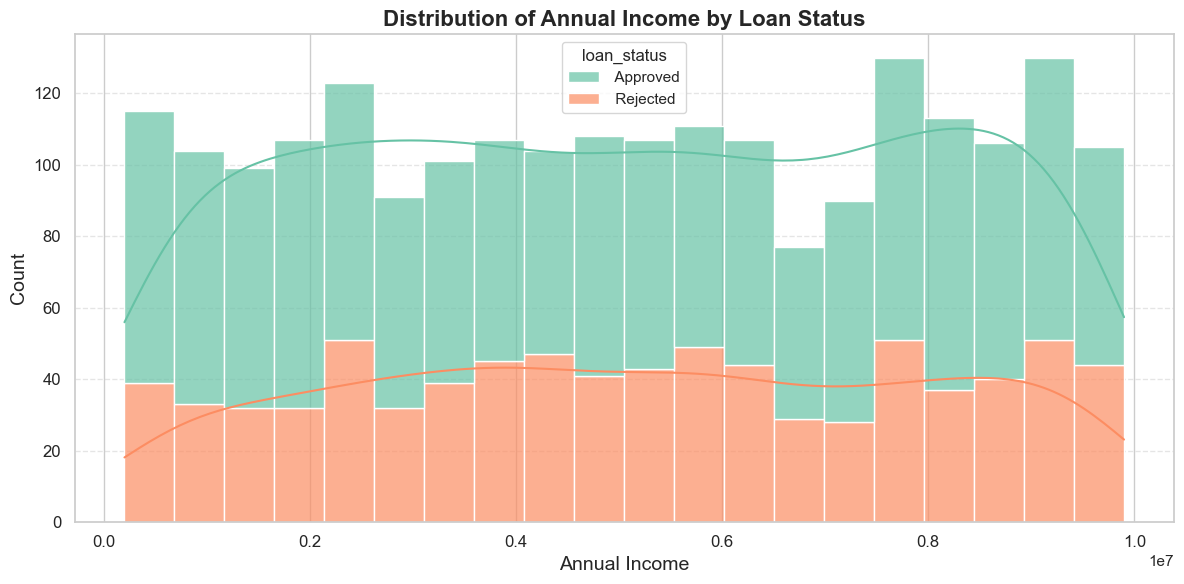

In [184]:
# Cài đặt style và màu sắc
sns.set(style="whitegrid", palette="Set2")

# Tạo biểu đồ histogram + KDE
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data,
    x="income_annum",
    hue="loan_status",     # phân biệt theo loan_status
    bins=20,               # số cột
    kde=True,              # thêm đường KDE
    multiple="stack",      # chồng cột thay vì chồng mờ
    alpha=0.7,             # độ trong suốt
    stat="count"           # hiển thị số lượng
)

# Tiêu đề và nhãn trục
plt.title("Distribution of Annual Income by Loan Status", fontsize=16, fontweight="bold")
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Tùy chỉnh ticks và grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Căn chỉnh layout
plt.tight_layout()

plt.show()

- Code của anh í

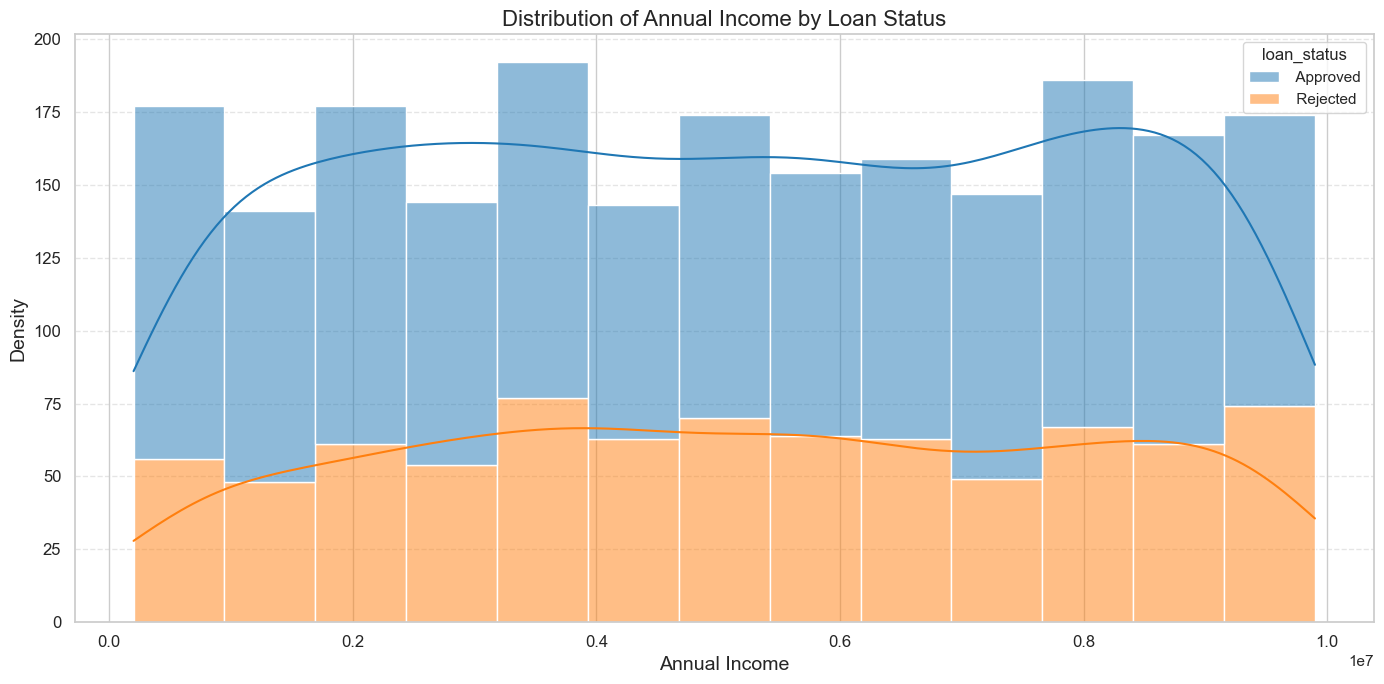

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="colorblind")

# Create a larger figure and plot the distribution
plt.figure(figsize=(14, 7))
ax = sns.histplot(data, x='income_annum', hue='loan_status', kde=True, multiple='stack', palette='tab10') #stack nghĩa là các histogram sẽ chồng lên nhau

# Customize labels and title
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Annual Income by Loan Status', fontsize=16)

# Adjust ticks for better appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# **Question 2: In the given dataset, which factor appears to be the most important in determining loan status? In your opinion, why does this factor hold such significance in predicting loan outcomes?**

**Tạo biểu đồ xác định yếu tố quan trọng nhất**

In [190]:
import sklearn


- Code của ChatGPT

**Tiền xử lý biến định tính**

In [191]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["loan_status"] = le.fit_transform(data["loan_status"])
data["education"] = le.fit_transform(data["education"])
data["self_employed"] = le.fit_transform(data["self_employed"])


**Heatmap để xem correlation**

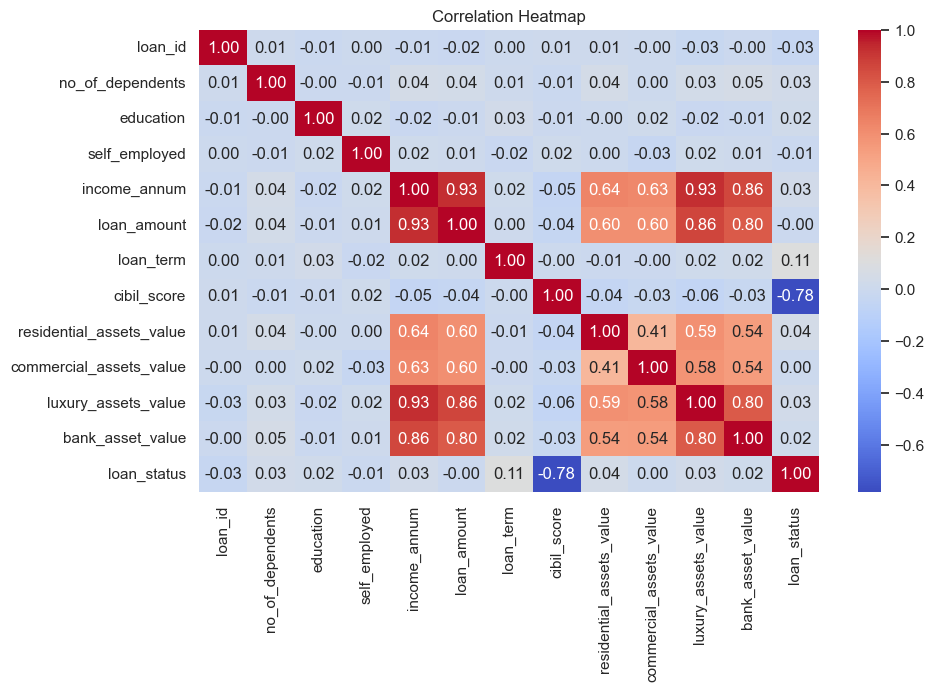

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Tính feature importances với Random Forest**

In [232]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop("loan_status", axis=1)
y = data["loan_status"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


**Vẽ biểu đồ top feature importances**

C:\Users\anhth\AppData\Local\Temp\ipykernel_24268\1100554325.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


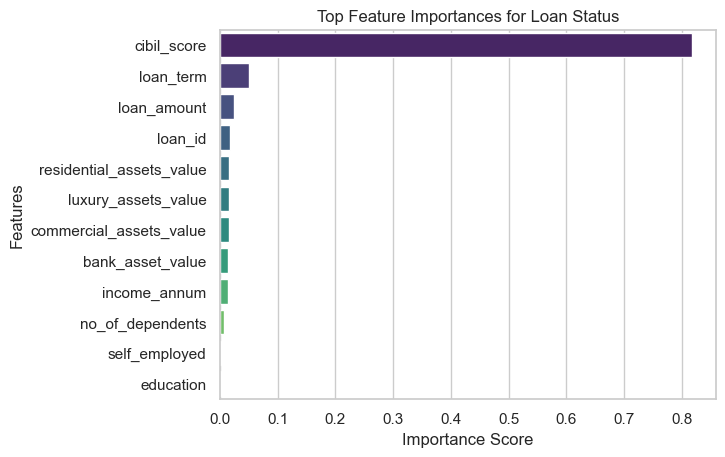

In [233]:
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Top Feature Importances for Loan Status")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


- Code của anh í

In [234]:
# Encode các cột không phải ở dạng số
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['education','self_employed','loan_status']
for i in col:
	data[i] = encoder.fit_transform(data[i])

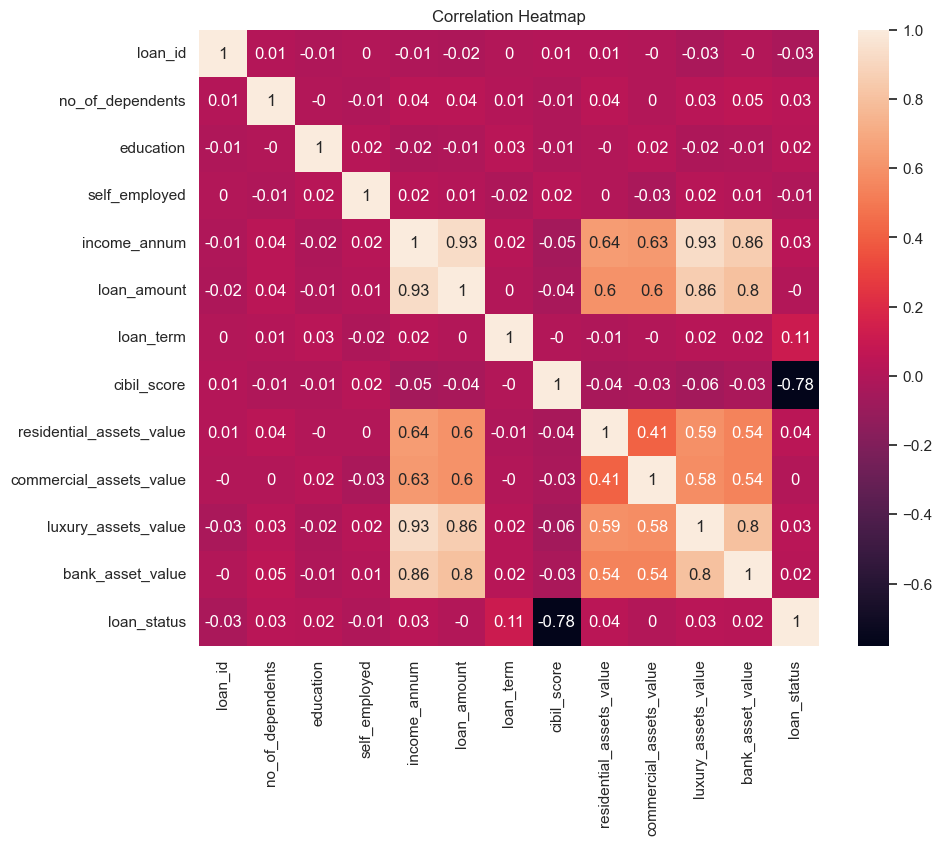

In [235]:
# Tạo heatmap để thể hiện sự tương quan giữa các cột
plt.figure(figsize=(10,8))
corr_matrix = round(data.corr(),2)
sns.heatmap(corr_matrix, annot=True)

plt.title("Correlation Heatmap")
plt.show()

**Ý nghĩa:**

- Chuẩn bị dữ liệu để huấn luyện mô hình:
- X là tất cả các biến giải thích (income_annum, loan_amount, cibil_score, …).
- y là biến cần dự đoán (loan_status).

Chia dữ liệu thành 2 phần:
- train (80%) → dùng để huấn luyện mô hình.
- test (20%) → dùng để đánh giá mô hình sau khi huấn luyện.

Nếu muốn tính toán feature_importances_ của mô hình (như trong RandomForest, DecisionTree, XGBoost, v.v.) → thì bắt buộc phải huấn luyện mô hình để lấy ra giá trị importances.

In [236]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Ý nghĩa:**
- Tạo một mô hình Random Forest cơ bản (base_model).
- Huấn luyện mô hình với dữ liệu huấn luyện (X_train, y_train). <br> <br>
Sau khi fit xong, ta có thể:
- Dùng model để dự đoán: base_model.predict(X_test)
- Xem mức độ quan trọng của các biến: base_model.feature_importances_ → đây là lý do gọi nó là feature selection.

In [237]:
## feature selection
from sklearn.ensemble import RandomForestClassifier
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


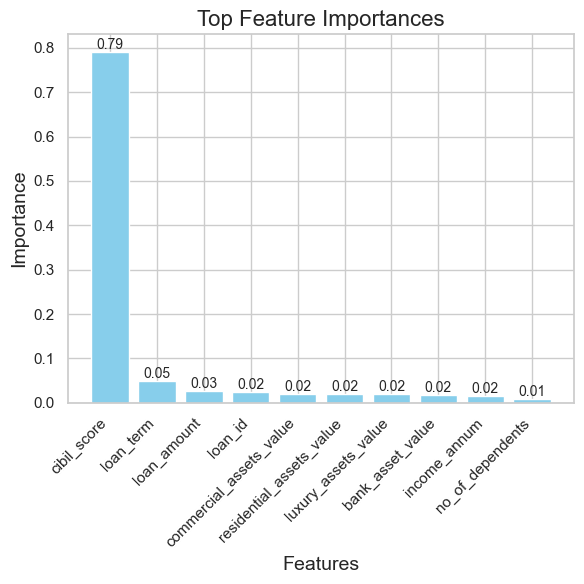

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate feature importances
importances = base_model.feature_importances_
df_importance = pd.DataFrame(importances, index=X_train.columns, columns=['importance'])
df_importance = df_importance.sort_values(by='importance', ascending=False)

# Set the number of features to display
top_n = 10
df_top_importance = df_importance.head(top_n)

# Create a bar plot
plt.figure(figsize=(6, 6))
bars = plt.bar(df_top_importance.index, df_top_importance['importance'], color='skyblue')

# Add titles and labels
plt.title('Top Feature Importances', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

<Axes: >

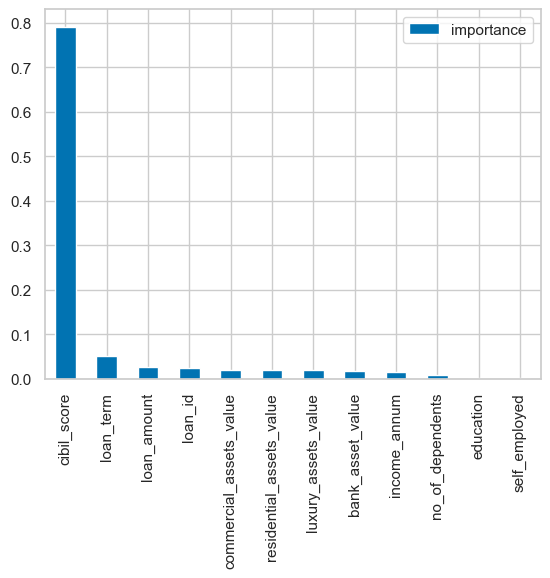

In [239]:
## feature importance
importances = base_model.feature_importances_
df_importance = pd.DataFrame(importances, index=X_train.columns, columns=['importance'])
df_importance = df_importance.sort_values(by='importance', ascending=False)
df_importance.plot(kind='bar')